# Esercizio 1

Un macchinario riempie automaticamente delle confezioni alimentari il cui peso segue una distribuzione normale di media 220 g e deviazione standard 8 g.

1. Qual è la probabilità che la confezione pesi più di 230 g?
2. Qual è la probabilità che il peso della confezione sia compreso tra 210 g e 225 g?
3. Le confezioni vengono imballate in scatole da 10 unità. Dopo aver calcolato la distribuzione del peso della scatola, calcolare la probabilità che il peso totale superi i 2250 g (si trascuri il peso della scatola).


In [9]:
import numpy as np
from scipy.stats import norm

media = 220
dev_std = 8

# Quesito 1

punto1 = 1 - norm.cdf(230, media, dev_std)
print("Probabilità che la confezioni pesi più di 230g: ", punto1)

# Quesito 2

a = norm.cdf(210, media, dev_std)
b = norm.cdf(225, media, dev_std)

punto2 = b - a

print("Probabilità che il peso della confezione sia compreso tra 210g e 225g: ", punto2)

# Quesito 3

media_totale = 10 * media
dev_std_totale = np.sqrt(10) * dev_std

punto3 = 1 - norm.cdf(2250, media_totale, dev_std_totale)

print("Probabilità che il peso totale della scatola superi i 2250g:", punto3)

Probabilità che la confezioni pesi più di 230g:  0.10564977366685535
Probabilità che il peso della confezione sia compreso tra 210g e 225g:  0.6283646972844441
Probabilità che il peso totale della scatola superi i 2250g: 0.02405341394425975


# Esercizio 2

Si considerino i seguenti dati, ottenuti sperimentalmente per determinare l’effetto del tempo in ore (x) a una particolare temperatura e il cambiamento della viscosità (y) di un olio.

| x   | 0.25  | 0.5   | 0.75  | 1     | 1.25  | 1.5   | 1.75  | 2     | 2.25  | 2.5   |
| --- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| y   | -1.42 | -1.39 | -1.55 | -1.89 | -2.43 | -3.15 | -4.05 | -5.15 | -6.43 | -7.89 |

1. Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%. Si calcoli il coefficiente di determinazione.
2. Si rappresentino i dati e la retta di regressione in uno stesso grafico.
3. Si determinino i coefficienti per un modello di regressione lineare del tipo y = a0 + a1x + a2x^2 e si calcoli nuovamente il coefficiente di determinazione. Si può affermare che il secondo modello si adatta meglio ai dati? Giustificare la risposta.
4. Si rappresentino i dati, la retta di regressione e il modello quadratico in uno stesso grafico.


In [10]:
import numpy as np
from scipy.stats import t

x = np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
y = np.array([-1.42, -1.39, -1.55, -1.89, -2.43, -3.15, -4.05, -5.15, -6.43, -7.89])
n = x.size

# Quesito 1

x_bar = np.mean(x)
y_bar = np.mean(y)

sig_bar_xy = np.sum((x - x_bar) * (y - y_bar)) / n
sig2_bar_x = np.sum((x - x_bar) ** 2) / n
sig2_bar_y = np.sum((y - y_bar) ** 2) / n

b0 = y_bar - (sig_bar_xy / sig2_bar_x) * x_bar
b1 = sig_bar_xy / sig2_bar_x

print("Coefficienti della retta di regressione: ")
print(b0, b1)

y_hat = b0 + b1 * x
r = y - y_hat
s2 = np.sum(r**2) / (n - 2)

alpha = 0.05
s = np.sqrt(s2)
T = t.ppf(1 - alpha / 2, n - 2)

b0_left = b0 - s * np.sqrt(1 / n + x_bar**2 / (n * sig2_bar_x)) * T
b0_right = b0 + s * np.sqrt(1 / n + x_bar**2 / (n * sig2_bar_x)) * T

b1_left = b1 - (s / np.sqrt(sig2_bar_x * n)) * T
b1_right = b1 + (s / np.sqrt(sig2_bar_x * n)) * T

print("Intervalli di confidenza per b0: [{}, {}]".format(b0_left, b0_right))
print("Intervalli di confidenza per b1: [{}, {}]".format(b1_left, b1_right))

R2 = sig_bar_xy**2 / (sig2_bar_x * sig2_bar_y)

print("Coefficiente di determinazione: ", R2)

Coefficienti della retta di regressione: 
0.4219999999999997 -2.877818181818182
Intervalli di confidenza per b0: [-0.7734427558000845, 1.617442755800084]
Intervalli di confidenza per b1: [-3.648470361659376, -2.107166001976988]
Coefficiente di determinazione:  0.9026209868993411


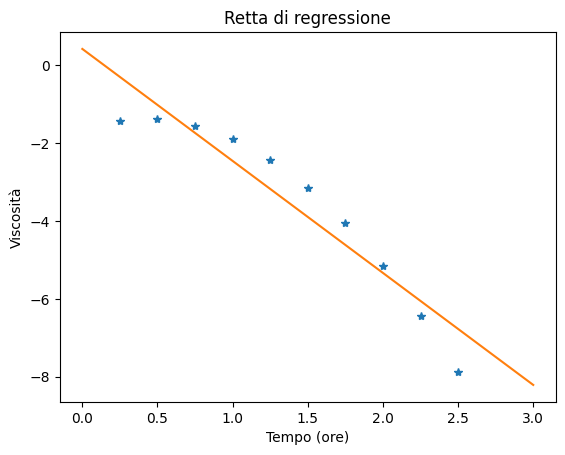

In [11]:
# Quesito 2

import matplotlib.pyplot as plt

assex = np.linspace(0, 3, 1000)
assey = b0 + b1 * assex

plt.plot(x, y, "*")
plt.plot(assex, assey)
plt.title("Retta di regressione")
plt.xlabel("Tempo (ore)")
plt.ylabel("Viscosità")
plt.show()

# Esercizio 3

Si effettua uno studio su quale sia la temperatura corporea limite per cui essa si possa considerare normale. Si estrae un campione di 25 soggetti riportando le seguenti misurazioni in °C:

36.6, 36.2, 36.3, 36.4, 36.6, 36.6, 36.7, 36.7, 36.7, 36.7,
36.8, 36.8, 36.8, 36.9, 36.9, 36.9, 36.9, 37.0, 37.0, 37.1,
37.1, 37.1, 37.2, 37.2, 37.2.

1. Si calcolino la media e la deviazione standard campionarie, e l’intervallo di confidenza per la media con livello di fiducia 0.01.
2. Si testi l’ipotesi che la temperatura limite normale media sia di 37 °C. Si utilizzi α = 0.05.
3. Calcolare il p-value del test.
4. Quale sarebbe la dimensione campionaria richiesta per determinare una temperatura limite reale di 36.8 °C richiedendo una potenza del test del 90%?


In [12]:
import numpy as np
from scipy.stats import t

X = np.array([
    36.6, 36.2, 36.3, 36.4, 36.6, 36.6, 36.7, 36.7, 36.7, 36.7,
    36.8, 36.8, 36.8, 36.9, 36.9, 36.9, 36.9, 37.0, 37.0, 37.1,
    37.1, 37.1, 37.2, 37.2, 37.2,
])

n = X.size

# Quesito 1

media = np.mean(X)
S = np.std(X, ddof=1)


alpha = 0.01
T = t.ppf(1 - alpha / 2, n - 1)

int_left = media - (S / np.sqrt(n)) * T
int_right = media + (S / np.sqrt(n)) * T

print("Media campionaria:", media)
print("Deviazione standard campionaria:", dev_std)
print("Intervallo di confidenza per la media [{}, {}]".format(int_left, int_right))

# Quesito 2 (Test bilatero)

mu_0 = 37
alpha = 0.05

T0 = ((media - mu_0) / S) * np.sqrt(n)

print("|T0|: ", np.abs(T0))
print("T: ", T)
print("T0 > T: Si rigetta l'ipotesi nulla")

# Quesito 3

p_value = 2 * (1 - t.cdf(abs(T0), n - 1))

print("p-value:", p_value)

# Quesito 4

alpha = 0.05
beta = 0.90
delta = 36.8

T_alpha = t.ppf(1 - alpha / 2, n - 1)
T_beta = t.ppf(1 - beta / 2, n - 1)

dimensione_campionaria = (T_alpha + T_beta) ** 2 * (media**2 / delta**2)

print("Dimensione campionaria: ", dimensione_campionaria)

Media campionaria: 36.816
Deviazione standard campionaria: 8
Intervallo di confidenza per la media [36.66307790275085, 36.968922097249155]
|T0|:  3.365353197057517
T:  2.796939504772804
T0 > T: Si rigetta l'ipotesi nulla
p-value: 0.0025669012584850215
Dimensione campionaria:  4.804202726939552
